In [1]:
# Import thư viện cần dùng
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import datetime as dt
%matplotlib inline
import statsmodels.api as sm
import statsmodels.formula.api as smf
import missingno as msno
import plotly.express as px
import plotly.graph_objects as go
import datetime

from sklearn.compose import make_column_transformer

# Scaling
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler

# Modelling
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Importing plotly and cufflinks in offline mode
import cufflinks as cf
import plotly.offline
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
import plotly.graph_objects as go

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

# Figure&Display options
plt.rcParams["figure.figsize"] = (16, 9)
pd.set_option('max_colwidth',200)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 200)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

!pip install termcolor
!pip install colorama
import colorama
from colorama import Fore, Style  # makes strings colored
from termcolor import colored
from termcolor import cprint

import ipywidgets
from ipywidgets import interact


!pip install wordcloud
from wordcloud import WordCloud

!pip install squarify
import squarify as sq

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.0 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.0 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.0 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.0 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# 1. Import dữ liệu:
import pandas as pd
df = pd.read_excel('Group-12-48K21.1.xlsx')
df

,Thời gian tạo đơn,Mã đơn hàng,Mã khách hàng,Tên khách hàng,Mã PKKH,Mô tả Phân Khúc Khách hàng,Mã nhóm hàng,Tên nhóm hàng,Mã mặt hàng,Tên mặt hàng,SL,Đơn giá,Thành tiền
0,2022-01-01 08:01:09,ORD0000001,CUZ00001,Lê Vũ Tâm,A1,"Nhân viên văn phòng, chủ doanh nghiệp (36-45 tuổi) có mức thu nhập cao, thường xuyên tìm hiểu và quan tâm đến sức khoẻ",BOT,Bột,BOT01,Bột cần tây,1,40000,40000
1,2022-01-01 08:01:09,ORD0000001,CUZ00001,Lê Vũ Tâm,A1,"Nhân viên văn phòng, chủ doanh nghiệp (36-45 tuổi) có mức thu nhập cao, thường xuyên tìm hiểu và quan tâm đến sức khoẻ",SET,Set trà,SET03,Set 10 gói trà hoa cúc trắng,1,150000,150000
2,2022-01-01 08:01:09,ORD0000001,CUZ00001,Lê Vũ Tâm,A1,"Nhân viên văn phòng, chủ doanh nghiệp (36-45 tuổi) có mức thu nhập cao, thường xuyên tìm hiểu và quan tâm đến sức khoẻ",THO,Trà hoa,THO05,Trà hoa Atiso,1,50000,50000
3,2022-01-01 08:01:09,ORD0000001,CUZ00001,Lê Vũ Tâm,A1,"Nhân viên văn phòng, chủ doanh nghiệp (36-45 tuổi) có mức thu nhập cao, thường xuyên tìm hiểu và quan tâm đến sức khoẻ",TTC,"Trà củ, quả sấy",TTC01,Trà gừng,1,30000,30000
4,2022-01-01 08:18:12,ORD0000002,CUZ00002,Phạm Công Bình,A2,"Nhân viên văn phòng, Freelancer ở Miền Bắc (25-35 tuổi) có nhu cầu chăm sóc sức khỏe và quan tâm đến các sản phẩm về trà",BOT,Bột,BOT01,Bột cần tây,1,40000,40000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
82132,2022-12-31 23:35:13,ORD0031436,CUZ05008,Phùng Quốc Anh,B1,Người làm kinh doanh hoặc văn phòng (45+ tuổi) có thu nhập trung bình có nhu cầu uống trà để hỗ trợ chữa các bệnh nền,TMX,Trà mix,TMX03,Trà gạo lứt 8 vị,1,18000,18000
82133,2022-12-31 23:41:46,ORD0031437,CUZ03356,Đoàn Thành Thái,A1,"Nhân viên văn phòng, chủ doanh nghiệp (36-45 tuổi) có mức thu nhập cao, thường xuyên tìm hiểu và quan tâm đến sức khoẻ",BOT,Bột,BOT01,Bột cần tây,1,40000,40000
82134,2022-12-31 23:41:46,ORD0031437,CUZ03356,Đoàn Thành Thái,A1,"Nhân viên văn phòng, chủ doanh nghiệp (36-45 tuổi) có mức thu nhập cao, thường xuyên tìm hiểu và quan tâm đến sức khoẻ",TMX,Trà mix,TMX02,Trà cam sả quế,1,38000,38000
82135,2022-12-31 23:48:48,ORD0031438,CUZ08388,Nguyễn Hoàng Khiêm,A1,"Nhân viên văn phòng, chủ doanh nghiệp (36-45 tuổi) có mức thu nhập cao, thường xuyên tìm hiểu và quan tâm đến sức khoẻ",BOT,Bột,BOT01,Bột cần tây,1,40000,40000


<a id="1."></a>
<font color="lightseagreen" size=+0.5><b>2. Tiền xử lý dữ liệu</b></font>


<a id="1."></a>
<font color="blue" size=+0.5><b>2.1 Thống kê mô tả</b></font>


In [3]:
# 1. Một số hàm sử dụng trong tiền xử lý dữ liệu

# Hàm kiểm tra các giá trị thiếu trong DataFrame
def missing_values(df):
    # Tính số lượng và tỷ lệ % các giá trị bị thiếu theo từng cột
    missing_number = df.isnull().sum().sort_values(ascending=False)
    missing_percent = (df.isnull().sum() / len(df)*100).sort_values(ascending=False)
    # Gộp số lượng và phần trăm vào cùng một bảng
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return missing_values[missing_values['Missing_Number']>0]


# Hàm in thông tin tổng quan về DataFrame
def first_looking(df):
    # Đổi tên cột cho chuẩn trước
    df.columns = df.columns.str.lower().str.replace('&', '_').str.replace(' ', '_')

    # In ra các cột hiện tại
    print(colored("Current Columns:", attrs=['bold']), list(df.columns))
    print(colored('*'*100, 'red', attrs=['bold']))

    # Group by theo mã khách hàng
    grouped_df = df.groupby('mã_khách_hàng').agg({
        'mã_đơn_hàng': 'nunique',               # Tổng số lượng mua
        'đơn_giá': 'mean',          # Trung bình đơn giá
        'thành_tiền': 'sum'         # Tổng thành tiền
    }).reset_index()

    # In thông tin tổng quan
    print(colored("Shape:", attrs=['bold']), grouped_df.shape, '\n',
          colored('*'*100, 'red', attrs=['bold']),
          colored("\nInfo:\n", attrs=['bold']), sep='')
    print(grouped_df.info(), '\n',
          colored('*'*100, 'red', attrs=['bold']), sep='')

    # Số lượng giá trị duy nhất
    print(colored("Number of Uniques:\n", attrs=['bold']), grouped_df.nunique(), '\n',
          colored('*'*100, 'red', attrs=['bold']), sep='')

    # Giá trị thiếu
    print(colored("Missing Values:\n", attrs=['bold']), missing_values(grouped_df), '\n',
          colored('*'*100, 'red', attrs=['bold']), sep='')

    # Tất cả cột sau group
    print(colored("All Columns:", attrs=['bold']), list(grouped_df.columns), '\n',
          colored('*'*100, 'red', attrs=['bold']), sep='')

    # Thống kê mô tả cột số
    print(colored("Descriptive Statistics (Numeric)\n", attrs=['bold']), grouped_df.describe().round(2), '\n',
          colored('*'*100, 'red', attrs=['bold']), sep='')

    # Thống kê mô tả cột chuỗi từ df ban đầu
    categorical_columns = [
        'thời_gian_tạo_đơn', 'mã_đơn_hàng', 'mã_khách_hàng', 'tên_khách_hàng',
        'mã_pkkh', 'mô_tả_phân_khúc_khách_hàng', 'mã_nhóm_hàng', 'tên_nhóm_hàng',
        'mã_mặt_hàng', 'tên_mặt_hàng'
    ]
    print(colored("Descriptive Statistics (Categorical Columns)\n", attrs=['bold']),
          df[categorical_columns].describe(include=object).T, '\n',
          colored('*'*100, 'red', attrs=['bold']), sep='')

# Hàm in ra thông tin về các giá trị duy nhất cho tất cả các cột trong DataFrame
def unique_values(df):
    for col in df.columns:
        print(f"\nColumn name    : {col}")
        print(f"Num of uniques : {df[col].nunique()}")
        print(f"Unique values  : {df[col].unique()}")

# Hàm kiểm tra và loại bỏ các giá trị trùng lặp trong DataFrame
def duplicate_values(df):
    duplicate_values = df.duplicated(subset=None, keep='first').sum()
    if duplicate_values > 0:
        # Xóa các dòng trùng lặp (giữ dòng đầu tiên)
        df.drop_duplicates(keep='first', inplace=True)
        print(duplicate_values, colored(" Duplicates were dropped!"),'\n',
              colored('*'*100, 'red', attrs=['bold']), sep='')
    else:
        print(colored("There are no duplicates"),'\n',
              colored('*'*100, 'red', attrs=['bold']), sep='')

# Hàm loại bỏ các cột không cần thiết
def drop_columns(df, drop_columns):
    if drop_columns !=[]:
        df.drop(drop_columns, axis=1, inplace=True)
        print(drop_columns, 'Dropped')
    else:
        print(colored('We will now check the missing values and if necessary, the realted columns will be dropped!', attrs=['bold']),'\n',
              colored('*'*100, 'red', attrs=['bold']), sep='')

# Hàm điền giá trị thiếu bằng giá trị xuất hiện nhiều nhất (mode) trong một nhóm theo cột nhóm
def fill_most(df, group_col, col_name):
    for group in list(df[group_col].unique()):
        cond = df[group_col]==group
        mode = list(df[cond][col_name].mode())
        if mode != []:
            df.loc[cond, col_name] = df.loc[cond, col_name].fillna(df[cond][col_name].mode()[0])
        else:
            df.loc[cond, col_name] = df.loc[cond, col_name].fillna(df[col_name].mode()[0])
    print(df[col_name].value_counts(dropna=False))

# Hàm kiểm tra các giá trị âm, giá trị bằng 0 và giá trị thiếu trong các cột số
def validate_numeric_data(df, cols):
    # Kiểm tra và in thông tin dữ liệu cho các cột
    for col in cols:
        print(f"{col}:")
        print(f" - Số giá trị âm: {(df[col] < 0).sum()}")
        print(f" - Số giá trị bằng 0: {(df[col] == 0).sum()}")
        print(f" - Số giá trị thiếu: {df[col].isna().sum()}")
    print("\nDữ liệu trước khi loại bỏ giá trị bất thường:", df.shape)
    # Loại bỏ các hàng có giá trị âm trong tất cả các cột được chỉ định
    for col in cols:
        df = df[df[col] >= 0]

    print("\nDữ liệu sau khi loại bỏ giá trị bất thường:", df.shape)


In [4]:
# 2. In ra thông tin tổng quan về dữ liệu
first_looking(df)

Current Columns: ['thời_gian_tạo_đơn', 'mã_đơn_hàng', 'mã_khách_hàng', 'tên_khách_hàng', 'mã_pkkh', 'mô_tả_phân_khúc_khách_hàng', 'mã_nhóm_hàng', 'tên_nhóm_hàng', 'mã_mặt_hàng', 'tên_mặt_hàng', 'sl', 'đơn_giá', 'thành_tiền']
****************************************************************************************************
Shape:(9657, 4)
****************************************************************************************************
Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9657 entries, 0 to 9656
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   mã_khách_hàng  9657 non-null   object 
 1   mã_đơn_hàng    9657 non-null   int64  
 2   đơn_giá        9657 non-null   float64
 3   thành_tiền     9657 non-null   int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 301.9+ KB
None
****************************************************************************************************
Number of 

In [5]:
# 3.1 Kiểm tra kiểu dữ liệu của các cột trong dữ liệu
df.dtypes

thời_gian_tạo_đơn             object
mã_đơn_hàng                   object
mã_khách_hàng                 object
tên_khách_hàng                object
mã_pkkh                       object
mô_tả_phân_khúc_khách_hàng    object
mã_nhóm_hàng                  object
tên_nhóm_hàng                 object
mã_mặt_hàng                   object
tên_mặt_hàng                  object
sl                             int64
đơn_giá                        int64
thành_tiền                     int64
dtype: object

In [6]:
# 3.2 Tách cột thời gian và chuyển đổi kiểu dữ liệu thành date time
# Chuyển cột "Thời gian tạo đơn" thành kiểu datetime
df["thời_gian_tạo_đơn"] = pd.to_datetime(df["thời_gian_tạo_đơn"])

# Tạo 2 cột mới từ cột "Thời gian tạo đơn"
df["ngày_tạo_đơn"] = df["thời_gian_tạo_đơn"].dt.normalize()  # Chỉ lấy phần ngày và giữ kiểu datetime
df["giờ_tạo_đơn"] = df["thời_gian_tạo_đơn"].dt.time  # Giữ giờ dưới dạng kiểu time (datetime.time)

# Xóa cột "Thời gian tạo đơn" sau khi đã tạo cột mới.
drop_columns(df, "thời_gian_tạo_đơn")

# Đưa cột "Ngày tạo đơn" và "Giờ tạo đơn" lên làm 2 cột đầu tiên trong bảng dữ liệu.
column_order = ["ngày_tạo_đơn", "giờ_tạo_đơn"] + [col for col in df.columns if col not in ["ngày_tạo_đơn", "giờ_tạo_đơn"]]

# Sắp xếp lại DataFrame
df = df[column_order]
df.dtypes


thời_gian_tạo_đơn Dropped


ngày_tạo_đơn                  datetime64[ns]
giờ_tạo_đơn                           object
mã_đơn_hàng                           object
mã_khách_hàng                         object
tên_khách_hàng                        object
mã_pkkh                               object
mô_tả_phân_khúc_khách_hàng            object
mã_nhóm_hàng                          object
tên_nhóm_hàng                         object
mã_mặt_hàng                           object
tên_mặt_hàng                          object
sl                                     int64
đơn_giá                                int64
thành_tiền                             int64
dtype: object

In [7]:
# 4. Kiểm tra giá trị trùng lặp
duplicate_values(df)

There are no duplicates
****************************************************************************************************


In [8]:
# 5. Kiểm tra giá trị duy nhất ở các cột
unique_values(df)


Column name    : ngày_tạo_đơn
Num of uniques : 365
Unique values  : <DatetimeArray>
['2022-01-01 00:00:00', '2022-01-02 00:00:00', '2022-01-03 00:00:00',
 '2022-01-04 00:00:00', '2022-01-05 00:00:00', '2022-01-06 00:00:00',
 '2022-01-07 00:00:00', '2022-01-08 00:00:00', '2022-01-09 00:00:00',
 '2022-01-10 00:00:00',
 ...
 '2022-12-22 00:00:00', '2022-12-23 00:00:00', '2022-12-24 00:00:00',
 '2022-12-25 00:00:00', '2022-12-26 00:00:00', '2022-12-27 00:00:00',
 '2022-12-28 00:00:00', '2022-12-29 00:00:00', '2022-12-30 00:00:00',
 '2022-12-31 00:00:00']
Length: 365, dtype: datetime64[ns]

Column name    : giờ_tạo_đơn
Num of uniques : 23965
Unique values  : [datetime.time(8, 1, 9) datetime.time(8, 18, 12) datetime.time(8, 25, 7)
 ... datetime.time(23, 27, 53) datetime.time(23, 41, 46)
 datetime.time(23, 48, 48)]

Column name    : mã_đơn_hàng
Num of uniques : 31438
Unique values  : ['ORD0000001' 'ORD0000002' 'ORD0000003' ... 'ORD0031436' 'ORD0031437'
 'ORD0031438']

Column name    : mã_khá

In [9]:
# 6.1 Kiểm tra giá trị bị thiếu trong tất cả các cột
missing_values(df)

,Missing_Number,Missing_Percent
tên_khách_hàng,2518,3.07


In [10]:
# 6.2 Điền giá trị bị thiếu
fill_most(df, group_col='mã_khách_hàng', col_name='tên_khách_hàng')
# Kiểm tra lại giá trị bị thiếu trong tất cả các cột
missing_values(df)

tên_khách_hàng
Thành viên mới        2816
Nguyễn Thanh Tùng      222
Nguyễn Tuấn Anh        177
Nguyễn Thanh Phong     124
Nguyễn Thành Công      116
                      ... 
Trịnh Hoài Dương         1
Bùi Ngọc Hoàng           1
Đào Hữu Văn              1
Mai Xuân Phúc            1
Trương Toàn Phương       1
Name: count, Length: 7671, dtype: int64


,Missing_Number,Missing_Percent


In [11]:
# 7. Kiểm tra các cột có kiểu là numeric
validate_numeric_data(df, ['sl', 'đơn_giá', 'thành_tiền'])

sl:
 - Số giá trị âm: 0
 - Số giá trị bằng 0: 0
 - Số giá trị thiếu: 0
đơn_giá:
 - Số giá trị âm: 0
 - Số giá trị bằng 0: 0
 - Số giá trị thiếu: 0
thành_tiền:
 - Số giá trị âm: 0
 - Số giá trị bằng 0: 0
 - Số giá trị thiếu: 0

Dữ liệu trước khi loại bỏ giá trị bất thường: (82137, 14)

Dữ liệu sau khi loại bỏ giá trị bất thường: (82137, 14)


<a id="1."></a>
<font color="blue" size=+0.5><b>2.2 Tính điểm RFM</b></font>


In [12]:
# 1. Tiến hành tính chỉ số RFM cho từng khách hàng

# Xác định ngày cuối cùng trong dữ liệu để tính Recency
max_date = df["ngày_tạo_đơn"].max()

# Tính RFM
rfm = df.groupby('mã_khách_hàng').agg({
    'ngày_tạo_đơn': lambda x: (max_date - x.max()).days,  # Recency
    'mã_đơn_hàng': 'nunique',  # Frequency
    'thành_tiền': 'sum'  # Monetary
})

# Đổi tên các cột cho đúng với RFM
rfm.columns = ['Recency', 'Frequency', 'Monetary']
# Tính các giá trị phân vị (quantiles) để phân nhóm khách hàng
quantiles = rfm.quantile(q = [0.25, 0.50, 0.75])

# In ra các phân vị và bảng RFM
print(quantiles)
print(rfm)

      Recency  Frequency  Monetary
0.25    18.00       1.00 131000.00
0.50    71.00       1.00 249000.00
0.75   200.00       4.00 614000.00
               Recency  Frequency  Monetary
mã_khách_hàng                              
CUZ00001           364          1    270000
CUZ00002           364          1    250000
CUZ00003           364          1    110000
CUZ00004           364          1     63000
CUZ00005           364          1    260000
...                ...        ...       ...
CUZ09653             0          1    198000
CUZ09654             0          1    230000
CUZ09655             0          1    161000
CUZ09656             0          1    238000
CUZ09657             0          1     98000

[9657 rows x 3 columns]


In [ ]:
# 2.1 Định nghĩa Hàm tính toán điểm Recency cho mỗi khách hàng
def recency_scoring(rfm):
    # Xác định điểm Recency dựa trên giá trị 'Recency'
    if rfm.Recency <= 18.0:
        recency_score = 4
    elif rfm.Recency <= 71.0:
        recency_score = 3
    elif rfm.Recency <= 200.0:
        recency_score = 2
    else:
        recency_score = 1
    return recency_score

# Áp dụng hàm recency_scoring lên từng dòng của DataFrame rfm
rfm['Recency_Score'] = rfm.apply(recency_scoring, axis=1)
# Lấy ngẫu nhiên 10 dòng để kiểm tra
rfm.sample(10)

,Recency,Frequency,Monetary,Recency_Score
mã_khách_hàng,,,,
CUZ02882,284,1,115000,1
CUZ04027,157,2,466000,2
CUZ06882,90,1,245000,2
CUZ06531,102,1,221000,2
CUZ05257,139,1,165000,2
CUZ06928,88,1,100000,2
CUZ08417,30,1,283000,3
CUZ00800,82,7,1313000,2
CUZ04849,7,4,806000,4


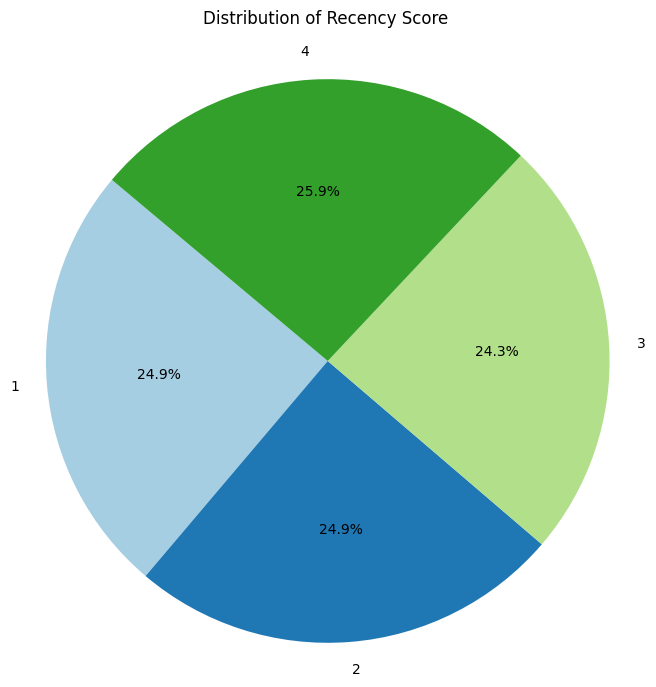

Recency_Score
1    2407
2    2406
3    2343
4    2501
Name: count, dtype: int64


In [14]:
# 2.2 Đếm số lượng và vẽ biểu đồ Recency_Score
# Đếm số lượng các giá trị khác nhau trong cột 'Recency_Score' và sắp xếp theo chỉ số
recency_counts = rfm['Recency_Score'].value_counts().sort_index()
# Thiết lập kích thước của biểu đồ
plt.figure(figsize=(8, 8))
# Vẽ biểu đồ tròn
plt.pie(
    recency_counts,                  # Giá trị cần vẽ
    labels=recency_counts.index,      # Gán nhãn cho từng phần
    autopct='%1.1f%%',                # Hiển thị phần trăm với 1 số thập phân
    startangle=140,                   # Góc bắt đầu vẽ
    colors=plt.cm.Paired.colors       # Sử dụng bảng màu Paired
)
# Thêm tiêu đề cho biểu đồ
plt.title('Distribution of Recency Score \n')

# Đảm bảo biểu đồ tròn không bị méo
plt.axis('equal')

# Hiển thị biểu đồ
plt.show()

# In ra bảng đếm số lượng của từng điểm Recency
print(recency_counts)

In [ ]:
# 3.1 Định nghĩa hàm tính điểm Frequency cho mỗi khách hàng
def frequency_scoring(rfm):
    # Xác định điểm Frequency dựa trên giá trị 'Frequency'
    if rfm.Frequency <= 1:
        frequency_score = 1
    elif rfm.Frequency <= 2:
        frequency_score = 2
    elif rfm.Frequency <= 4:
        frequency_score = 3
    else:
        frequency_score = 4
    return frequency_score

# Áp dụng hàm 'frequency_scoring' để tính điểm Frequency_Score cho từng khách hàng
rfm['Frequency_Score'] = rfm.apply(frequency_scoring, axis=1)

# Lấy mẫu 10 dòng ngẫu nhiên để kiểm tra
rfm.sample(10)

,Recency,Frequency,Monetary,Recency_Score,Frequency_Score
mã_khách_hàng,,,,,
CUZ03075,273,1,190000,1,1
CUZ00619,354,1,95000,1,1
CUZ00177,1,17,2993000,4,4
CUZ07519,41,2,173000,3,2
CUZ04901,148,1,50000,2,1
CUZ00996,346,1,123000,1,1
CUZ01924,322,1,75000,1,1
CUZ03593,2,6,854000,4,4
CUZ06955,87,1,270000,2,1


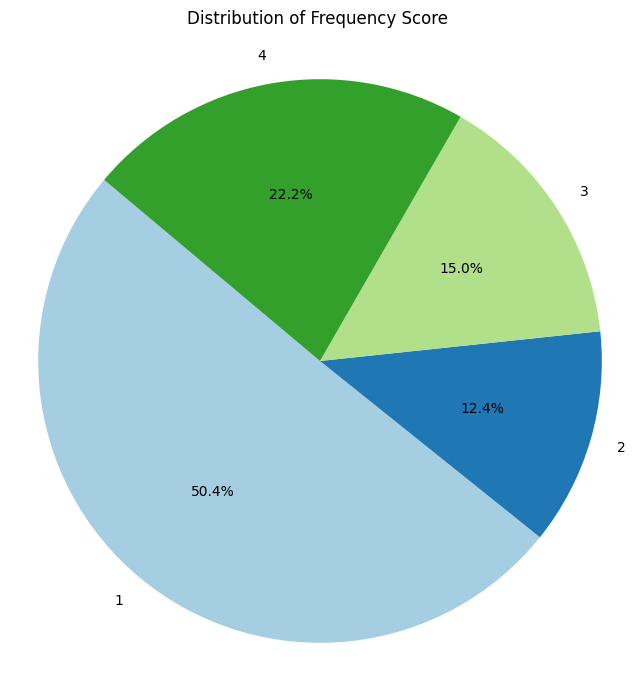

Frequency_Score
1    4863
2    1201
3    1449
4    2144
Name: count, dtype: int64


In [16]:
# 3.2 Đếm số lượng và vẽ biểu đồ Recency_Score
# Đếm số lượng các giá trị khác nhau trong cột 'Frequency_Score' và sắp xếp theo chỉ số
frequency_counts = rfm['Frequency_Score'].value_counts().sort_index()

# Thiết lập kích thước của biểu đồ
plt.figure(figsize=(8, 8))

# Vẽ biểu đồ tròn (pie chart) cho phân phối Frequency Score
plt.pie(
    frequency_counts,                  # Dữ liệu cần vẽ
    labels=frequency_counts.index,      # Nhãn cho từng phần của biểu đồ
    autopct='%1.1f%%',                  # Hiển thị phần trăm với 1 chữ số thập phân
    startangle=140,                     # Góc bắt đầu vẽ biểu đồ
    colors=plt.cm.Paired.colors         # Sử dụng bảng màu Paired cho các phần
)

# Thêm tiêu đề cho biểu đồ
plt.title('Distribution of Frequency Score \n')

# Đảm bảo biểu đồ tròn không bị méo
plt.axis('equal')

# Hiển thị biểu đồ
plt.show()

# In ra bảng đếm số lượng của từng điểm Frequency
print(frequency_counts)

In [17]:
# 4.1 Định nhĩa Hàm tính toán điểm Monetary cho mỗi khách hàng
def monetary_scoring(rfm):
    # Xác định điểm Monetary dựa trên giá trị 'Monetary'
    if rfm.Monetary >= 614000:
        monetary_score = 4
    elif rfm.Monetary >= 249000:
        monetary_score = 3
    elif rfm.Monetary >= 131000:
        monetary_score = 2
    else:
        monetary_score = 1
    return monetary_score
# Áp dụng hàm 'monetary_scoring' lên toàn bộ DataFrame 'rfm' để tính điểm Monetary_scoring
rfm['Monetary_Score'] = rfm.apply(monetary_scoring, axis=1)
rfm.sample(10)

,Recency,Frequency,Monetary,Recency_Score,Frequency_Score,Monetary_Score
mã_khách_hàng,,,,,,
CUZ09326,9,1,115000,4,1,1
CUZ02892,238,3,306000,1,3,3
CUZ00395,358,1,85000,1,1,1
CUZ01801,150,4,314000,2,3,3
CUZ03927,14,6,948000,4,4,4
CUZ01908,206,4,575000,1,3,3
CUZ05246,86,3,439000,2,3,3
CUZ01653,89,2,283000,2,2,3
CUZ04686,155,1,163000,2,1,2


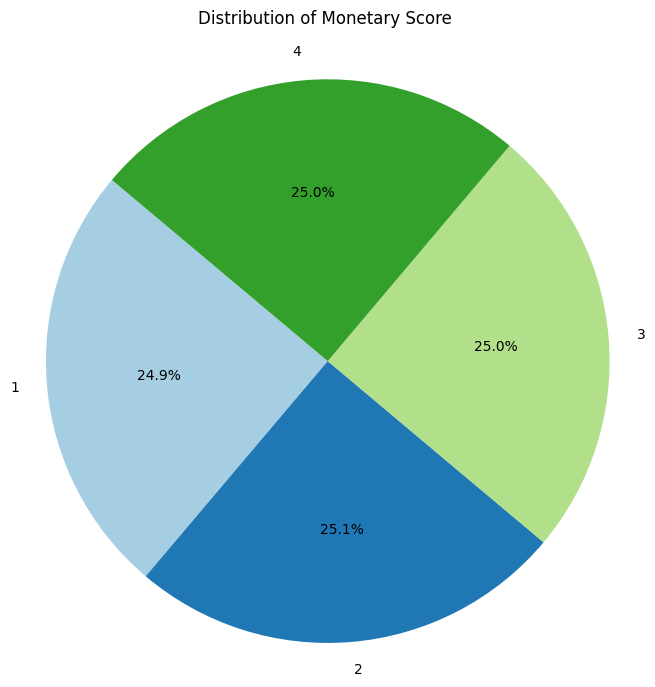

Monetary_Score
1    2408
2    2420
3    2410
4    2419
Name: count, dtype: int64


In [18]:
# 4.2 Đếm số lượng và vẽ biểu đồ Monetary_Score

# Đếm số lượng các giá trị khác nhau trong cột 'Monetary_Score' và sắp xếp theo chỉ số
monetary_counts = rfm['Monetary_Score'].value_counts().sort_index()

# Thiết lập kích thước cho biểu đồ
plt.figure(figsize=(8, 8))

# Vẽ biểu đồ tròn (pie chart) cho phân phối Monetary Score
plt.pie(
    monetary_counts,                  # Dữ liệu cần vẽ
    labels=monetary_counts.index,      # Nhãn cho từng phần của biểu đồ (dùng monetary_counts thay vì recency_counts)
    autopct='%1.1f%%',                 # Hiển thị phần trăm với 1 chữ số thập phân
    startangle=140,                    # Góc bắt đầu vẽ biểu đồ
    colors=plt.cm.Paired.colors        # Sử dụng bảng màu Paired cho các phần
)

# Thêm tiêu đề cho biểu đồ
plt.title('Distribution of Monetary Score \n')

# Đảm bảo biểu đồ tròn không bị méo
plt.axis('equal')

# Hiển thị biểu đồ
plt.show()

# In ra bảng đếm số lượng của từng điểm Monetary
print(monetary_counts)


In [19]:
# 5.1 Định nghĩa hàm tính điểm RFM (Recency, Frequency, Monetary) cho khách hàng
def rfm_scoring(customer):
    # Tính toán điểm RFM bằng cách nối các giá trị của Recency_Score, Frequency_Score, và Monetary_Score
    return str(int(customer['Recency_Score'])) + str(int(customer['Frequency_Score'])) + str(int(customer['Monetary_Score']))

# Áp dụng hàm 'rfm_scoring' vào toàn bộ DataFrame 'rfm' để tính điểm RFM cho mỗi khách hàng
rfm['Customer_RFM_Score'] = rfm.apply(rfm_scoring, axis=1)
# In ra một số mẫu ngẫu nhiên trong DataFrame 'rfm' để kiểm tra kết quả
rfm.sample(8)

,Recency,Frequency,Monetary,Recency_Score,Frequency_Score,Monetary_Score,Customer_RFM_Score
mã_khách_hàng,,,,,,,
CUZ08784,17,2,420000,4,2,3,423
CUZ09576,2,1,135000,4,1,2,412
CUZ06132,36,5,968000,3,4,4,344
CUZ03209,262,1,95000,1,1,1,111
CUZ08819,21,1,163000,3,1,2,312
CUZ04588,80,4,634000,2,3,4,234
CUZ08393,30,1,256000,3,1,3,313
CUZ03117,167,2,207000,2,2,2,222


In [20]:
import plotly.io as pio
pio.renderers.default = 'colab'

In [22]:
# 5.2 Sử dụng plotly để tạo một biểu đồ cột hiển thị phân phối điểm RFM

# Đếm số lượng khách hàng cho mỗi điểm RFM trong cột 'Customer_RFM_Score' và sắp xếp theo chỉ số
score_counts = rfm['Customer_RFM_Score'].value_counts().sort_index()

# Tạo biểu đồ cột (bar chart) với Plotly
fig = px.bar(
    x=score_counts.index,                # Trục x: các giá trị điểm RFM (Customer_RFM_Score)
    y=score_counts.values,               # Trục y: số lượng khách hàng cho mỗi điểm RFM
    title='Customer RFM Score Distribution',  # Tiêu đề cho biểu đồ
    labels={'x': 'Customer_RFM_Score', 'y': 'Counts'}  # Đặt nhãn cho các trục x và y
)

# Hiển thị biểu đồ
fig.show()


In [23]:
# 6.1 Tạo DataFrame với các phân khúc khách hàng và các biểu thức RFM
segments = {
    'Customer_Segment': [
        'Champion',
        'Top Loyal Customer',
        'Loyal Customer',
        'Top Recent Customer',
        'Recent Customer',
        'Top Customer Needed Attention',
        'Customer Needed Attention',
        'Top Lost Customer',
        'Lost Customer'
    ],
    'RFM': [
        '(2|3|4)-(4)-(4)',        # Champion
        '(3)-(1|2|3|4)-(3|4)',    # Top Loyal Customer
        '(3)-(1|2|3|4)-(1|2)',    # Loyal Customer
        '(4)-(1|2|3|4)-(3|4)',    # Top Recent Customer
        '(4)-(1|2|3|4)-(1|2)',    # Recent Customer
        '(2|3)-(1|2|3|4)-(3|4)',  # Top Customer Needed Attention
        '(2|3)-(1|2|3|4)-(1|2)',  # Customer Needed Attention
        '(1)-(1|2|3|4)-(3|4)',    # Top Lost Customer
        '(1)-(1|2|3|4)-(1|2)'     # Lost Customer
    ]
}
segments

{'Customer_Segment': ['Champion',
  'Top Loyal Customer',
  'Loyal Customer',
  'Top Recent Customer',
  'Recent Customer',
  'Top Customer Needed Attention',
  'Customer Needed Attention',
  'Top Lost Customer',
  'Lost Customer'],
 'RFM': ['(2|3|4)-(4)-(4)',
  '(3)-(1|2|3|4)-(3|4)',
  '(3)-(1|2|3|4)-(1|2)',
  '(4)-(1|2|3|4)-(3|4)',
  '(4)-(1|2|3|4)-(1|2)',
  '(2|3)-(1|2|3|4)-(3|4)',
  '(2|3)-(1|2|3|4)-(1|2)',
  '(1)-(1|2|3|4)-(3|4)',
  '(1)-(1|2|3|4)-(1|2)']}

In [24]:
# 6.2 Định nghĩa hàm phân loại khách hàng dựa trên điểm số RFM
def categorizer(rfm):
# Duyệt qua các điều kiện phân loại
    if (rfm[0] in ['2', '3', '4']) & (rfm[1] in ['4']) & (rfm[2] in ['4']):
        rfm = 'Champion'

    elif (rfm[0] in ['3']) & (rfm[1] in ['1', '2', '3', '4']) & (rfm[2] in ['3', '4']):
        rfm = 'Top Loyal Customer'

    elif (rfm[0] in ['3']) & (rfm[1] in ['1', '2', '3', '4']) & (rfm[2] in ['1', '2']):
        rfm = 'Loyal Customer'

    elif (rfm[0] in ['4']) & (rfm[1] in ['1', '2', '3', '4']) & (rfm[2] in ['3', '4']):
        rfm = 'Top Recent Customer'

    elif (rfm[0] in ['4']) & (rfm[1] in ['1', '2', '3', '4']) & (rfm[2] in ['1', '2']):
        rfm = 'Recent Customer'

    elif (rfm[0] in ['2', '3']) & (rfm[1] in ['1', '2', '3', '4']) & (rfm[2] in ['3', '4']):
        rfm = 'Top Customer Needed Attention'

    elif (rfm[0] in ['2', '3']) & (rfm[1] in ['1', '2', '3', '4']) & (rfm[2] in ['1', '2']):
        rfm = 'Customer Needed Attention'

    elif (rfm[0] in ['1']) & (rfm[1] in ['1', '2', '3', '4']) & (rfm[2] in ['3', '4']):
        rfm = 'Top Lost Customer'

    elif (rfm[0] in ['1']) & (rfm[1] in ['1', '2', '3', '4']) & (rfm[2] in ['1', '2']):
        rfm = 'Lost Customer'

    return rfm

In [25]:
# 6.3 Áp dụng hàm categorizer vào cột 'Customer_RFM_Score' để phân loại khách hàng
rfm['Customer_Category'] = rfm["Customer_RFM_Score"].apply(categorizer)
rfm

,Recency,Frequency,Monetary,Recency_Score,Frequency_Score,Monetary_Score,Customer_RFM_Score,Customer_Category
mã_khách_hàng,,,,,,,,
CUZ00001,364,1,270000,1,1,3,113,Top Lost Customer
CUZ00002,364,1,250000,1,1,3,113,Top Lost Customer
CUZ00003,364,1,110000,1,1,1,111,Lost Customer
CUZ00004,364,1,63000,1,1,1,111,Lost Customer
CUZ00005,364,1,260000,1,1,3,113,Top Lost Customer
...,...,...,...,...,...,...,...,...
CUZ09653,0,1,198000,4,1,2,412,Recent Customer
CUZ09654,0,1,230000,4,1,2,412,Recent Customer
CUZ09655,0,1,161000,4,1,2,412,Recent Customer


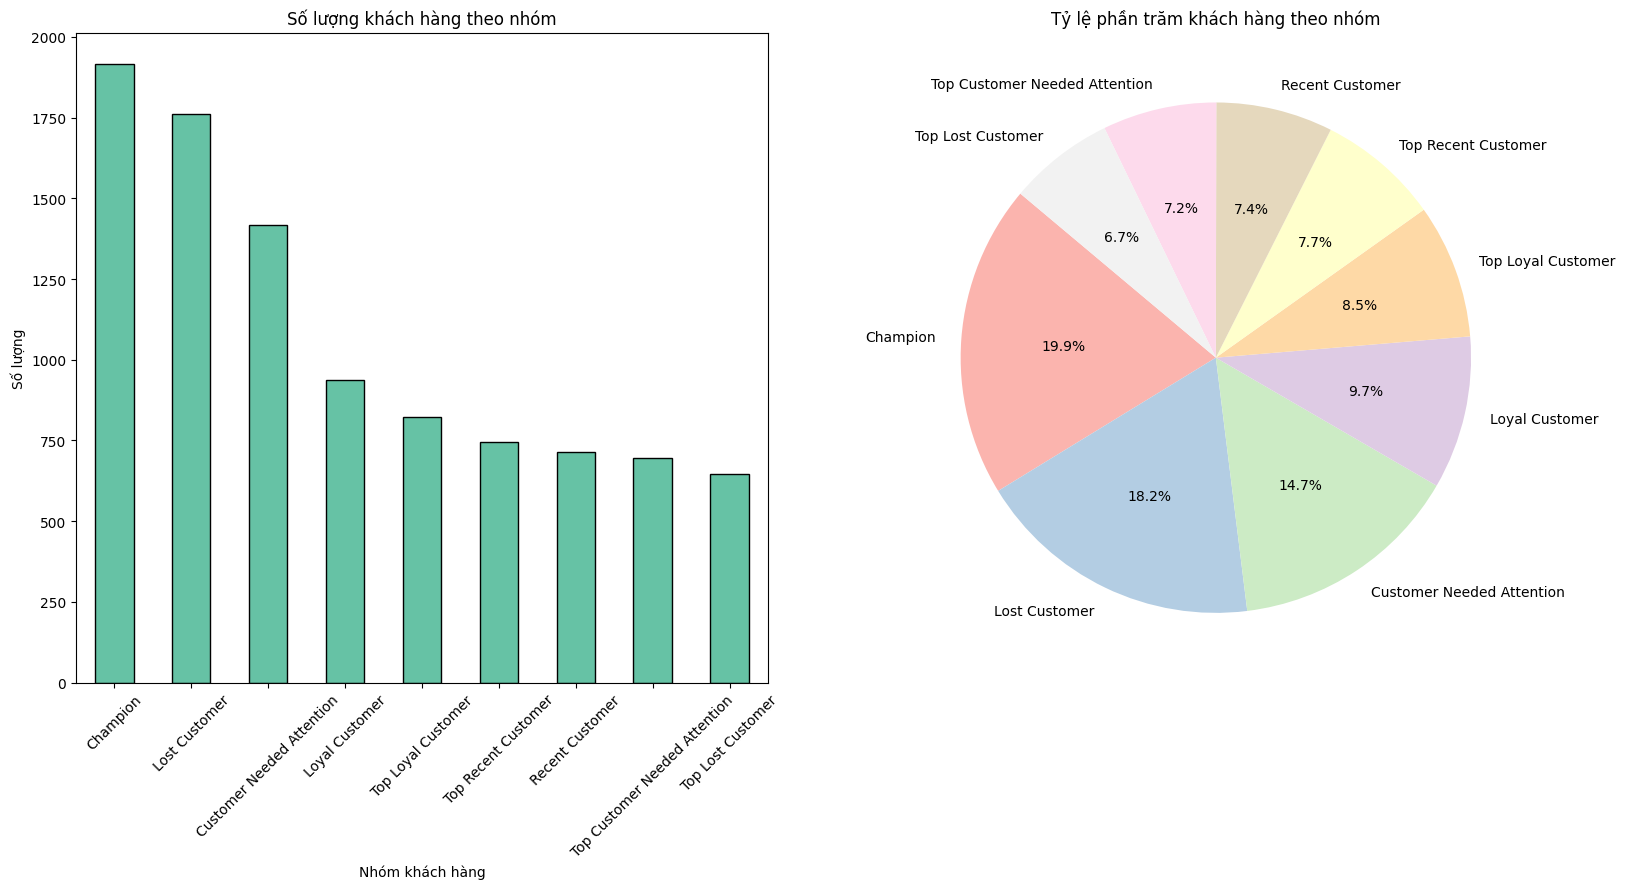

In [26]:
# 6.4 Vẽ biểu đồ từng nhóm phân loại
import matplotlib.pyplot as plt
# Đếm số lượng khách hàng theo từng nhóm phân loại
category_counts = rfm['Customer_Category'].value_counts()
# Tính tỷ lệ phần trăm khách hàng theo từng nhóm phân loại
category_percent = rfm['Customer_Category'].value_counts(normalize=True) * 100
# Thiết lập kích thước của biểu đồ
plt.figure(figsize=(17, 9))

# 6.4.1 Biểu đồ cột
# Vẽ biểu đồ cột để hiển thị số lượng khách hàng trong mỗi nhóm
plt.subplot(1, 2, 1)
category_counts.plot(kind='bar', color='#66c2a5', edgecolor='black')
plt.title('Số lượng khách hàng theo nhóm')
plt.xlabel('Nhóm khách hàng')
plt.ylabel('Số lượng')
plt.xticks(rotation=45)
# 6.4.2 Biểu đồ tròn
# Vẽ biểu đồ tròn để hiển thị tỷ lệ phần trăm khách hàng trong mỗi nhóm
plt.subplot(1, 2, 2)
plt.pie(category_percent,
        labels=category_percent.index,
        autopct='%1.1f%%',
        startangle=140,
        colors=plt.cm.Pastel1.colors)
plt.title('Tỷ lệ phần trăm khách hàng theo nhóm')
plt.axis('equal')
# Tự động điều chỉnh bố cục của các biểu đồ để tránh bị chồng lên nhau
plt.tight_layout()

# Hiển thị các biểu đồ
plt.show()

<a id="1."></a>
<font color="blue" size=+0.5><b>2.3 Normalizaion và Outliers</b></font>


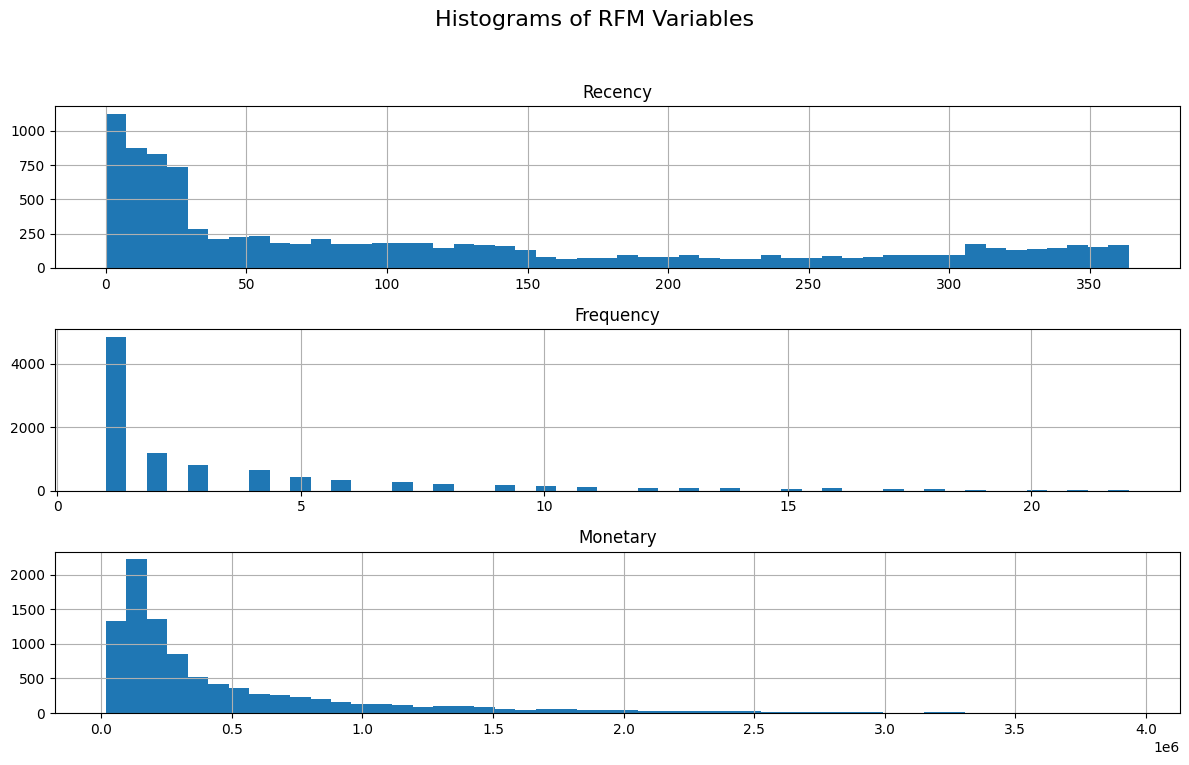

In [27]:
# 1. Vẽ biểu đồ histogram biểu diễn biểu đồ trước khi chuẩn hóa và xử lý outliers
import matplotlib.pyplot as plt

# Chọn 3 cột RFM
rfm_filtered = rfm[['Recency', 'Frequency', 'Monetary']]

# Vẽ histogram cho 3 cột RFM
ax = rfm_filtered.hist(bins=50, figsize=(12, 8), layout=(3, 1))

# Thêm tiêu đề
plt.suptitle("Histograms of RFM Variables", fontsize=16)
# Điều chỉnh bố cục để tiêu đề không bị che khuất
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
# Hiển thị biểu đồ
plt.show()


In [28]:
# 2.1 Thiết lập ngưỡng độ lệch (skewness) để xác định các cột có độ lệch cao
skew_limit = 0.75 # Đây là ngưỡng độ lệch để đánh giá, độ lệch tuyệt đối dưới 1 có thể chấp nhận được với các mô hình tuyến tính
# Tính độ lệch của các cột Recency, Frequency, Monetary
skew_vals = rfm[['Recency', 'Frequency', 'Monetary']].skew()
# Lọc ra các cột có độ lệch tuyệt đối lớn hơn skew_limit
skew_cols = skew_vals[abs(skew_vals)> skew_limit].sort_values(ascending=False)

skew_cols

Monetary    2.26
Frequency   2.14
Recency     0.83
dtype: float64

In [29]:
# 2.2 Xử lý độ lệch với Log Transformation

# Tạo một bản sao của các cột có độ lệch cao (skewed columns) từ dataframe rfm
rfm_log = rfm[skew_cols.index].copy()

# Duyệt qua từng tên cột có độ lệch cao
for col in skew_cols.index.values:
    # Áp dụng log transformation: log1p(x) = log(1 + x), giúp giảm độ lệch
    rfm_log[col] = rfm_log[col].apply(np.log1p)

    # In ra độ lệch mới (sau khi đã log transform) để kiểm tra sự cải thiện
    print(f"Skewness of {col}: {rfm_log[col].skew()}")


Skewness of Monetary: 0.28137587398845443
Skewness of Frequency: 1.0353023032186952
Skewness of Recency: -0.5832638529265666


In [30]:
# 2.3 Diễn giải độ lệch (skewness) sau khi log transform
for skew in rfm_log.skew():  # Lặp qua độ lệch của từng cột đã log-transform
    # Nếu độ lệch nằm trong khoảng -0.75 đến 0.75: xem như xấp xỉ đối xứng (symmetric)
    if -0.75 < skew < 0.75:
        print ("A skewness value of", '\033[1m', Fore.GREEN, skew, '\033[0m',
               "means that the distribution is approx.", '\033[1m', Fore.GREEN, "symmetric", '\033[0m')

    # Nếu độ lệch chỉ hơi nghiêng (từ 0.75 đến 1 hoặc -0.75 đến -1): lệch trung bình
    elif  -0.75 < skew < -1.0 or 0.75 < skew < 1.0:
        print ("A skewness value of", '\033[1m', Fore.YELLOW, skew, '\033[0m',
               "means that the distribution is approx.", '\033[1m', Fore.YELLOW, "moderately skewed", '\033[0m')

    # Ngược lại: nếu độ lệch lớn hơn ±1 thì là lệch mạnh (highly skewed)
    else:
        print ("A skewness value of", '\033[1m', Fore.RED, skew, '\033[0m',
               "means that the distribution is approx.", '\033[1m', Fore.RED, "highly skewed", '\033[0m')


A skewness value of   0.28137587398845443  means that the distribution is approx.   symmetric 
A skewness value of   1.0353023032186952  means that the distribution is approx.   highly skewed 
A skewness value of   -0.5832638529265666  means that the distribution is approx.   symmetric 


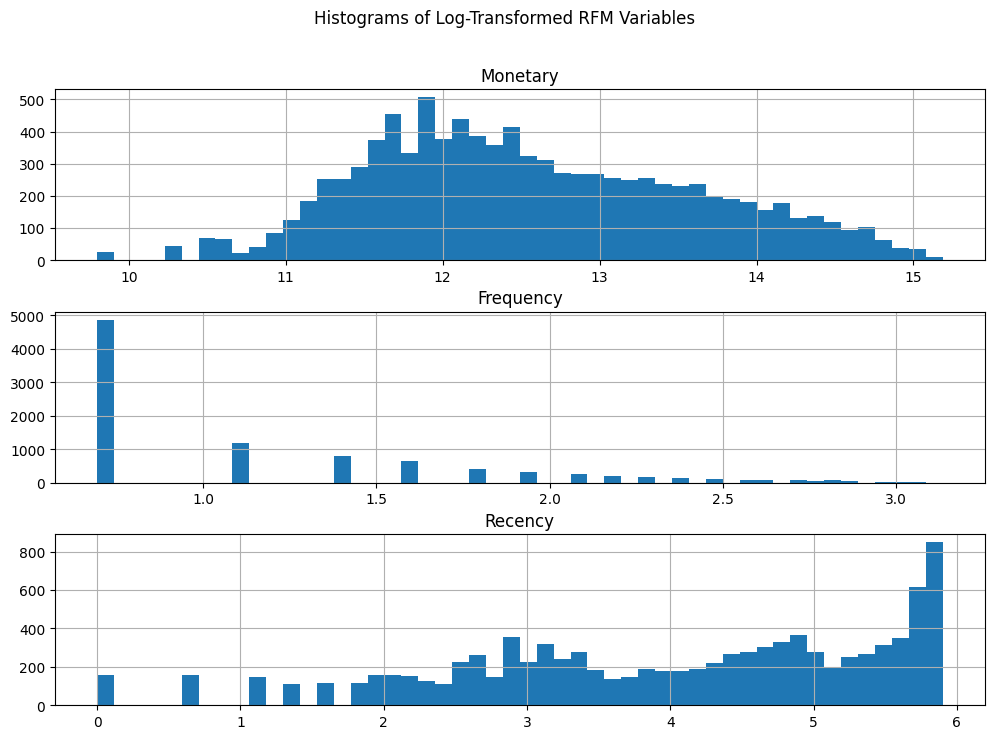

In [31]:
import matplotlib.pyplot as plt

# 2.4 Vẽ biểu đồ histogram cho các cột trong rfm_log
rfm_log.hist(bins=50, figsize=(12, 8), layout=(3, 1))

# Thêm tiêu đề cho biểu đồ
plt.suptitle("Histograms of Log-Transformed RFM Variables")

# Hiển thị biểu đồ
plt.show()

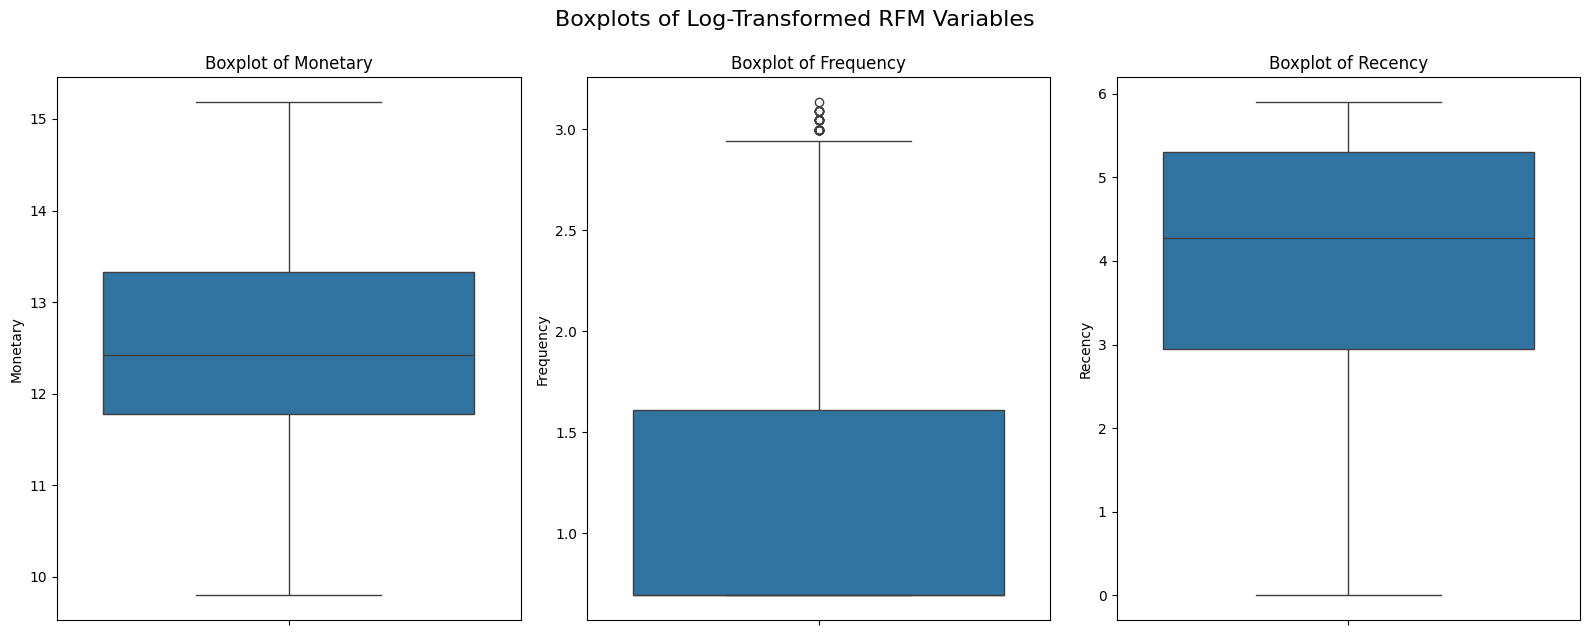

In [32]:
# 3.1 Vẽ các boxplot cho các biến trong rfm_log trước khi xử lý outliers

# Tạo figure với kích thước 16x6 inches
plt.figure(figsize=(16, 6))

# Vòng lặp qua từng cột trong dataframe rfm_log
for i, col in enumerate(rfm_log.columns):
    # Tạo từng subplot cho mỗi biến, xếp theo 1 dòng, nhiều cột (tùy theo số biến)
    plt.subplot(1, len(rfm_log.columns), i + 1)

    # Vẽ boxplot cho biến hiện tại
    sns.boxplot(y=rfm_log[col])

    # Đặt tiêu đề cho từng biểu đồ con
    plt.title(f'Boxplot of {col}')

    # Điều chỉnh bố cục cho đẹp, tránh chồng lấn
    plt.tight_layout()

# Đặt tiêu đề chung cho toàn bộ figure (lưu ý y > 1 để tiêu đề không bị đè lên các plot)
plt.suptitle('Boxplots of Log-Transformed RFM Variables', y=1.05, fontsize=16)

# Hiển thị biểu đồ
plt.show()


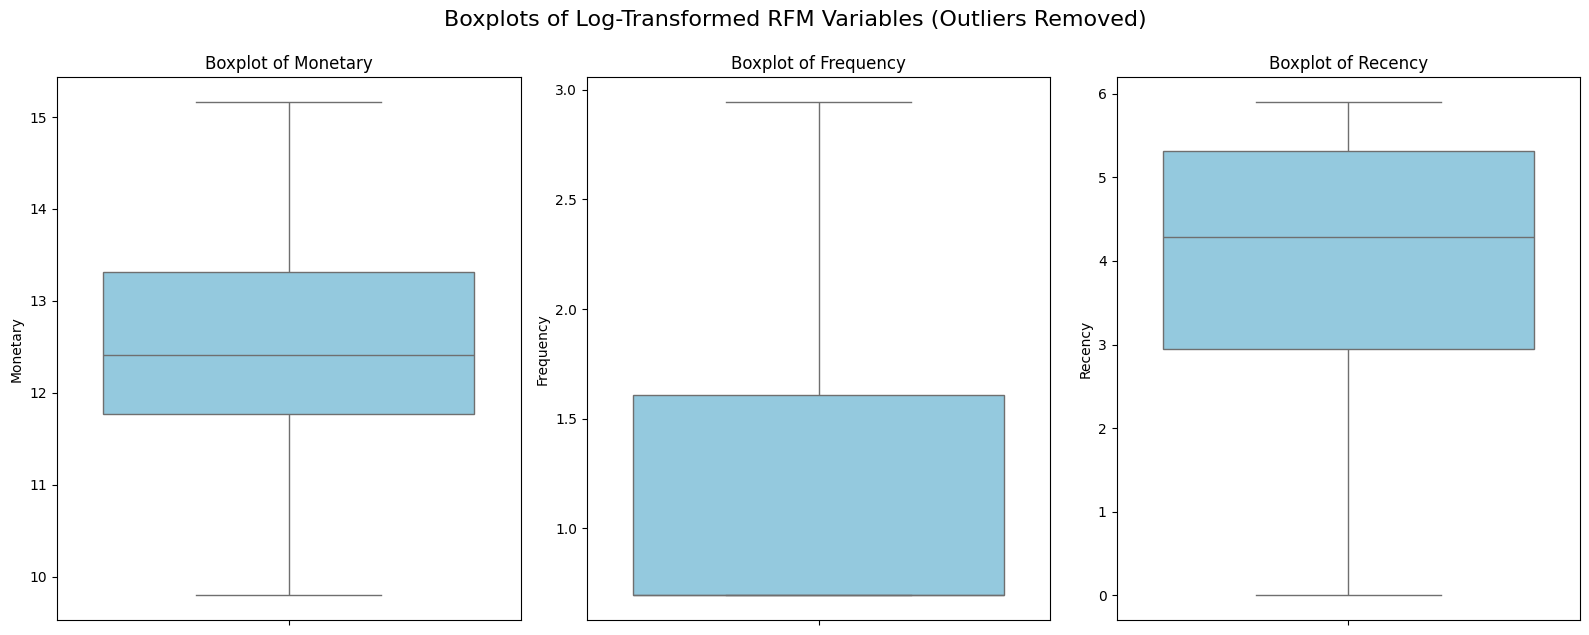

In [33]:
# 3.2 Vẽ biểu đồ Boxplot sau khi loại bỏ outlier bằng phương pháp IQR

# Tính Q1 (quartile 25%) cho từng biến trong rfm_log
Q1 = rfm_log.quantile(0.25)

# Tính Q3 (quartile 75%) cho từng biến trong rfm_log
Q3 = rfm_log.quantile(0.75)

# Tính khoảng IQR (Interquartile Range) = Q3 - Q1
IQR = Q3 - Q1

# Lọc ra các dòng KHÔNG phải là outlier:
# Điều kiện: giữ lại những dòng mà tất cả giá trị đều NẰM TRONG [Q1 - 1.5*IQR, Q3 + 1.5*IQR]
rfm_log_filtered = rfm_log[~((rfm_log < (Q1 - 1.5 * IQR)) | (rfm_log > (Q3 + 1.5 * IQR))).any(axis=1)]

# Vẽ lại boxplot sau khi đã loại bỏ outliers

plt.figure(figsize=(16, 6))

# Vòng lặp qua từng biến để vẽ boxplot
for i, col in enumerate(rfm_log_filtered.columns):
    plt.subplot(1, len(rfm_log_filtered.columns), i + 1)

    # Vẽ boxplot cho từng biến với màu 'skyblue'
    sns.boxplot(y=rfm_log_filtered[col], color='skyblue')

    # Đặt tiêu đề cho từng biểu đồ
    plt.title(f'Boxplot of {col}')

    # Căn chỉnh layout cho đẹp
    plt.tight_layout()

# Đặt tiêu đề tổng cho figure
plt.suptitle('Boxplots of Log-Transformed RFM Variables (Outliers Removed)', y=1.05, fontsize=16)

# Hiển thị tất cả biểu đồ
plt.show()

In [34]:
# 4.1 Sử dụng Power Transformer với phương pháp Yeo-Johnson để xử lý độ lệch (skewness) của các dữ liệu trong bộ dữ liệu
from sklearn.preprocessing import PowerTransformer

# Lấy lại cột 'mã_khách_hàng' từ chỉ mục (index)
customer_ids = rfm_log.index

# Lấy dữ liệu cần biến đổi (các cột có độ lệch)
rfm_before_trans = rfm_log[skew_cols.index].copy()

# Áp dụng PowerTransformer
pt = PowerTransformer(method='yeo-johnson')
trans = pt.fit_transform(rfm_before_trans)

# Tạo DataFrame mới từ kết quả biến đổi và gán lại tên cột
rfm_trans = pd.DataFrame(trans, columns=skew_cols.index)

# Thêm cột 'mã_khách_hàng' vào DataFrame đã biến đổi
rfm_trans['mã_khách_hàng'] = customer_ids

# Hiển thị kết quả
print(rfm_trans.head())
# Tính độ lệch (skewness) cho các cột số trong rfm_trans (loại bỏ cột mã_khách_hàng)
print(rfm_trans.drop(columns=['mã_khách_hàng']).skew())



   Monetary  Frequency  Recency mã_khách_hàng
0      0.01      -0.93     1.43      CUZ00001
1     -0.07      -0.93     1.43      CUZ00002
2     -0.92      -0.93     1.43      CUZ00003
3     -1.56      -0.93     1.43      CUZ00004
4     -0.03      -0.93     1.43      CUZ00005
Monetary     0.01
Frequency    0.34
Recency     -0.24
dtype: float64


In [35]:
# 4.2 Diễn giải độ lệch (Skewness)

# Vòng lặp qua từng giá trị skewness của các cột trong rfm_trans (bỏ cột 'mã_khách_hàng' vì không phải dữ liệu số)
for skew in rfm_trans.drop(columns=['mã_khách_hàng']).skew():

    # Nếu độ lệch nằm trong khoảng (-0.75, 0.75), tức là phân phối gần đối xứng
    if -0.75 < skew < 0.75:
        print ("A skewness value of", '\033[1m', Fore.GREEN, skew, '\033[0m',
               "means that the distribution is approx.", '\033[1m', Fore.GREEN, "symmetric", '\033[0m')

    # Nếu độ lệch nằm trong khoảng (-1.0, -0.75) hoặc (0.75, 1.0), tức là phân phối hơi lệch
    elif  -0.75 < skew < -1.0 or 0.75 < skew < 1.0:
        print ("A skewness value of", '\033[1m', Fore.YELLOW, skew, '\033[0m',
               "means that the distribution is approx.", '\033[1m', Fore.YELLOW, "moderately skewed", '\033[0m')

    # Các trường hợp còn lại: độ lệch lớn => phân phối bị lệch nhiều
    else:
        print ("A skewness value of", '\033[1m', Fore.RED, skew, '\033[0m',
               "means that the distribution is approx.", '\033[1m', Fore.RED, "highly skewed", '\033[0m')


A skewness value of   0.008939332910935986  means that the distribution is approx.   symmetric 
A skewness value of   0.3362101453509303  means that the distribution is approx.   symmetric 
A skewness value of   -0.23659862248653396  means that the distribution is approx.   symmetric 


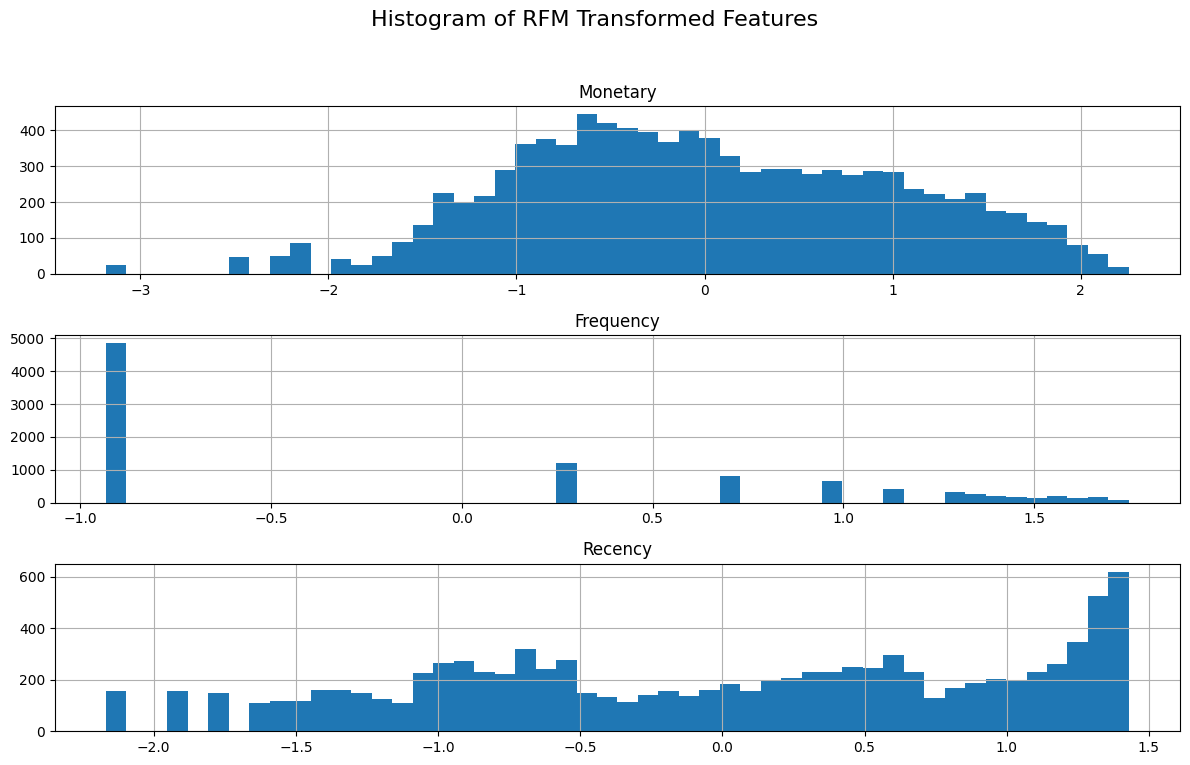

In [36]:
import matplotlib.pyplot as plt
# 4.3 Vẽ biểu đồ histogram cho 3 cột RFM (đã log transform)
rfm_trans.hist(bins=50, figsize=(12, 8), layout=(3, 1))

# Thêm tiêu đề chung cho toàn bộ biểu đồ
plt.suptitle("Histogram of RFM Transformed Features", fontsize=16)

# Hiển thị biểu đồ
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Để tránh tiêu đề bị đè
plt.show()


In [37]:
!pip install pyclustertend

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.0 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [38]:

from sklearn.cluster import KMeans, AgglomerativeClustering
from pyclustertend import hopkins
from sklearn.preprocessing import scale
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics import silhouette_samples,silhouette_score
from scipy.cluster.hierarchy import linkage, dendrogram
from yellowbrick.cluster import KElbowVisualizer

In [39]:
# 5.1 Chuẩn hóa dữ liệu bằng StandardScaler
from sklearn.preprocessing import StandardScaler

# Đảm bảo chỉ huấn luyện trên các cột số
scaler = StandardScaler()
scaler.fit(rfm_trans.drop(columns=['mã_khách_hàng']))

# Áp dụng chuẩn hóa trên các cột số, giữ lại cột 'mã_khách_hàng'
rfm_scaled = scaler.transform(rfm_trans.drop(columns=['mã_khách_hàng']))

# Chuyển đổi lại thành DataFrame với cột 'mã_khách_hàng' được giữ lại
rfm_scaled_df = pd.DataFrame(rfm_scaled, columns=rfm_trans.drop(columns=['mã_khách_hàng']).columns)
rfm_scaled_df['mã_khách_hàng'] = rfm_trans['mã_khách_hàng']

print(rfm_scaled_df)


      Monetary  Frequency  Recency mã_khách_hàng
0         0.01      -0.93     1.43      CUZ00001
1        -0.07      -0.93     1.43      CUZ00002
2        -0.92      -0.93     1.43      CUZ00003
3        -1.56      -0.93     1.43      CUZ00004
4        -0.03      -0.93     1.43      CUZ00005
...        ...        ...      ...           ...
9652     -0.30      -0.93    -2.17      CUZ09653
9653     -0.15      -0.93    -2.17      CUZ09654
9654     -0.51      -0.93    -2.17      CUZ09655
9655     -0.11      -0.93    -2.17      CUZ09656
9656     -1.05      -0.93    -2.17      CUZ09657

[9657 rows x 4 columns]


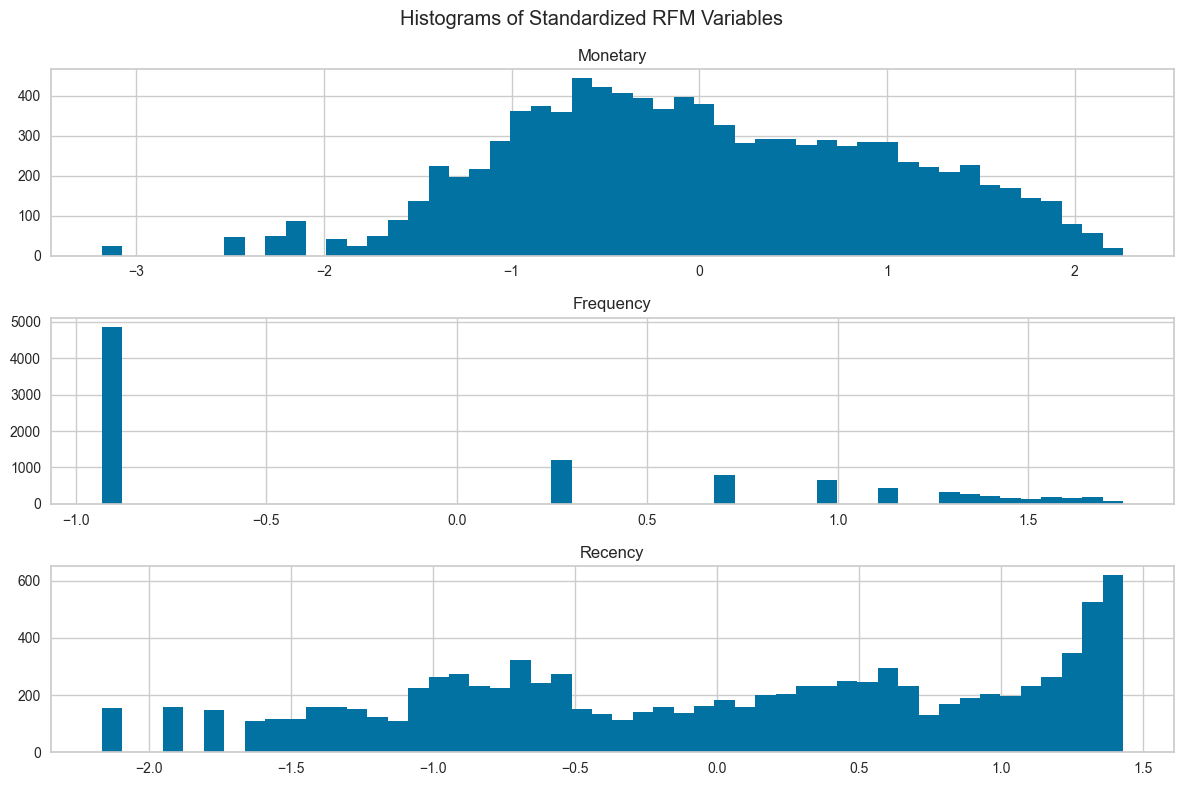

In [40]:
import matplotlib.pyplot as plt
# 5.2 Vẽ biểu đồ histogram cho 3 cột RFM (đã StandardScaler)
# Loại bỏ cột 'mã_khách_hàng' để vẽ histogram
rfm_scaled_only = rfm_scaled_df.drop(columns=['mã_khách_hàng'])

# Vẽ histogram
rfm_scaled_only.hist(bins=50, figsize=(12,8), layout=(3, 1))

# Thêm tiêu đề chung
plt.suptitle("Histograms of Standardized RFM Variables")

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

<a id="1."></a>
<font color="Green" size=+0.5><b>3. Phân cụm K-Means</b></font>


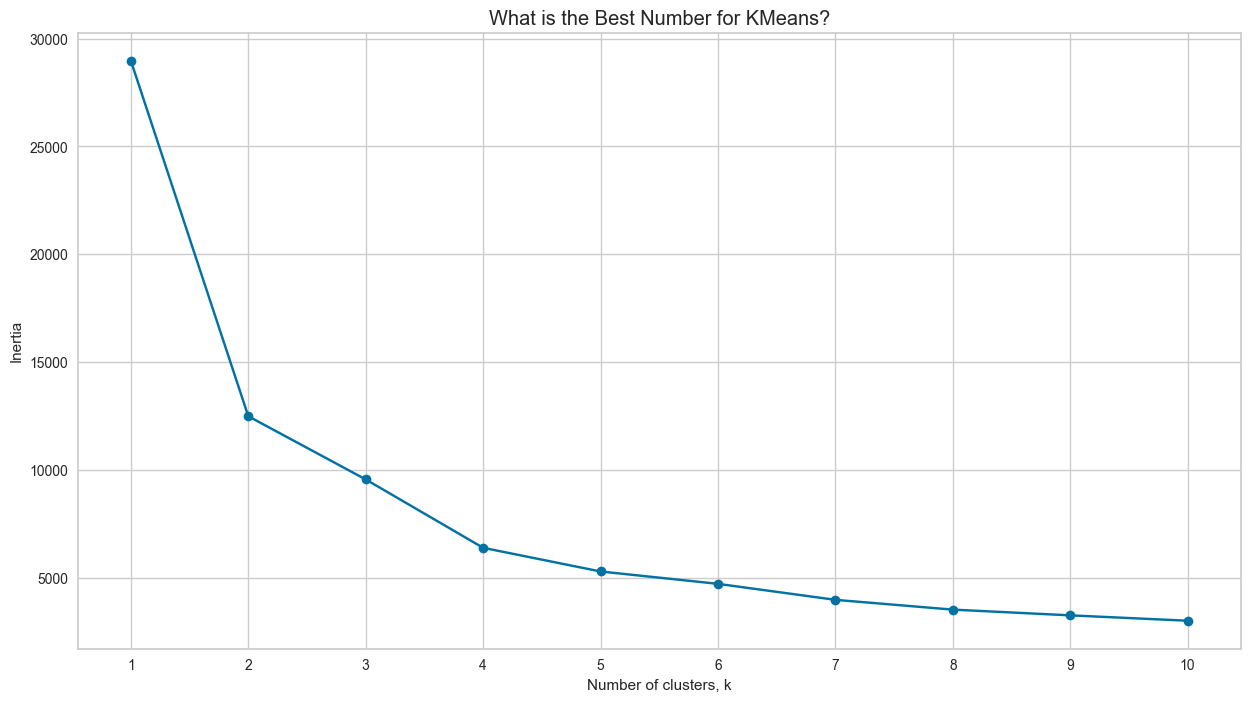

In [41]:
# 1.1 Vẽ đồ thị elbow để lựa chọn k tối ưu
# Tạo danh sách các giá trị k từ 1 đến 10
ks = range(1, 11)

# Danh sách để lưu giá trị inertia tương ứng với từng k
inertias=[]
# Vòng lặp qua từng giá trị k
for k in ks :
    kc = KMeans(n_clusters=k, random_state=42)
    kc.fit(rfm_scaled)
    inertias.append(kc.inertia_)

# Vẽ đồ thị Elbow
f, ax = plt.subplots(figsize=(15, 8))
plt.plot(ks, inertias, '-o')
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.xticks(ks)
plt.style.use('ggplot')
plt.title('What is the Best Number for KMeans?')
plt.show()

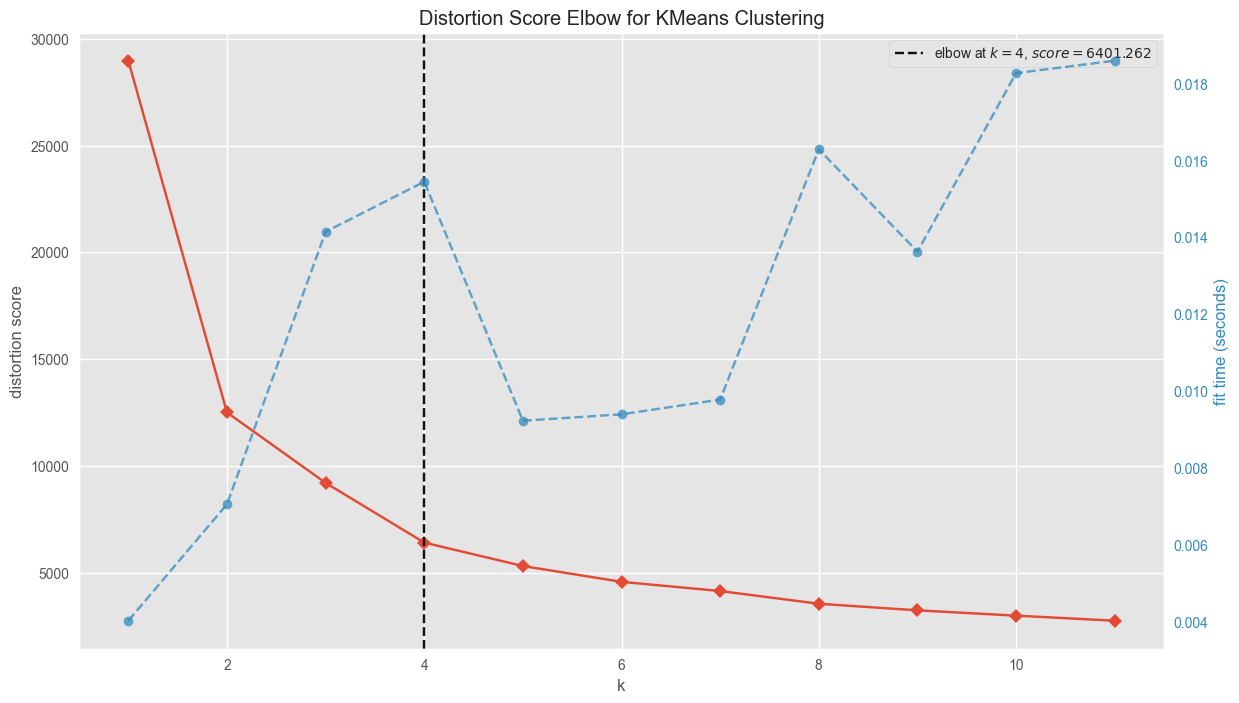

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [42]:
# 1.2 Xác Định Số Cụm Tối Ưu (k) Qua Biểu Đồ Elbow Trong Phân Cụm KMeans
# Thiết lập màu nền cho figure là màu trắng để biểu đồ nhìn sáng và rõ hơn
plt.rcParams['figure.facecolor'] = 'white'

# Khởi tạo mô hình KMeans (chưa xác định số lượng cụm k)
model = KMeans()

# Khởi tạo KElbowVisualizer để tự động vẽ đường cong Elbow
# k=(1,12) nghĩa là kiểm tra số lượng cụm từ 1 đến 11
visualizer = KElbowVisualizer(model, k=(1, 12))

# Thiết lập kích thước của figure
plt.figure(figsize=(14, 8))

# Fit dữ liệu chuẩn hóa (rfm_scaled) vào visualizer để vẽ biểu đồ inertia theo từng k
visualizer.fit(rfm_scaled)

# Hiển thị biểu đồ Elbow
visualizer.show()


In [43]:
# 2. Chạy thuật toán K-Means để phân cụm khách hàng

# Khởi tạo mô hình KMeans với 4 cụm
kmeans = KMeans(n_clusters=4).fit(rfm_scaled)

# Huấn luyện mô hình và dự đoán nhãn phân cụm cho dữ liệu
kmeans.fit_predict(rfm_scaled)

# Lấy nhãn phân cụm từ mô hình
labels = kmeans.labels_

# Thêm cột 'ClusterID' vào DataFrame rfm_trans để lưu nhãn phân cụm
rfm_trans['ClusterID'] = labels

# Hiển thị kết quả DataFrame sau khi thêm cột 'ClusterID'
rfm_trans


,Monetary,Frequency,Recency,mã_khách_hàng,ClusterID
0,0.01,-0.93,1.43,CUZ00001,1
1,-0.07,-0.93,1.43,CUZ00002,1
2,-0.92,-0.93,1.43,CUZ00003,1
3,-1.56,-0.93,1.43,CUZ00004,1
4,-0.03,-0.93,1.43,CUZ00005,1
...,...,...,...,...,...
9652,-0.30,-0.93,-2.17,CUZ09653,2
9653,-0.15,-0.93,-2.17,CUZ09654,2
9654,-0.51,-0.93,-2.17,CUZ09655,2
9655,-0.11,-0.93,-2.17,CUZ09656,2


In [44]:
# 2. Vẽ biểu đồ phân phối tỷ lệ phân cụm khách hàng
import plotly.express as px

# Tạo DataFrame từ value_counts
cluster_counts = rfm_trans['ClusterID'].value_counts().reset_index()
cluster_counts.columns = ['ClusterID', 'Count']

# Vẽ biểu đồ tròn
fig = px.pie(cluster_counts,
             values='Count',
             names='ClusterID',
             title='Predicted Clusters Distribution')
# Hiển thị biểu đồ
fig.show()

In [45]:
# 3. Vẽ biểu đồ 3D trực quan 2 cụm khách hàng
import plotly.graph_objects as go  # Import thư viện Plotly Graph Objects để tạo biểu đồ 3D

# Dữ liệu
x = rfm_trans.iloc[:, 0]  # Chọn cột đầu tiên 'Recency' (Độ gần đây)
y = rfm_trans.iloc[:, 1]  # Chọn cột thứ hai 'Frequency' (Tần suất, đã qua phép log-transformed)
z = rfm_trans.iloc[:, 2]  # Chọn cột thứ ba 'Monetary' (Giá trị chi tiêu, đã qua phép log-transformed)

# Centroids là tâm của các cụm được KMeans tính toán
centroids = kmeans.cluster_centers_

# Khởi tạo một đối tượng figure
fig = go.Figure()

# Thêm trace (dữ liệu) cho biểu đồ 3D
fig.add_trace(go.Scatter3d(
    x=x,  # Dữ liệu trục x (Recency)
    y=y,  # Dữ liệu trục y (Frequency)
    z=z,  # Dữ liệu trục z (Monetary)
    mode='markers',  # Dạng hiển thị là các điểm (markers)
    marker=dict(
        size=5,  # Kích thước của các điểm
        color=labels,  # Màu sắc của các điểm dựa trên cụm phân loại (labels)
        colorscale='Viridis',  # Sử dụng bảng màu Viridis
        opacity=0.8  # Độ trong suốt của các điểm
    ),
    name='Customers'  # Tên hiển thị cho dữ liệu này
))

# Cập nhật bố cục (layout) của biểu đồ
fig.update_layout(
    scene=dict(
        xaxis_title='Recency',  # Tiêu đề trục x
        yaxis_title='Frequency',  # Tiêu đề trục y
        zaxis_title='Monetary'  # Tiêu đề trục z
    ),
    title='3D Visualization of RFM Clusters with Centroids'  # Tiêu đề của biểu đồ
)

# Hiển thị biểu đồ
fig.show()


In [46]:
rfm['ClusterID'] = kmeans.labels_

In [47]:
cluster_category_counts = rfm.groupby(['ClusterID', 'Customer_Category']).size().unstack(fill_value=0)

# Bảng số lượng khách hàng
styled_counts = cluster_category_counts.style.set_caption("SỐ LƯỢNG KHÁCH HÀNG THEO CUSTOMER_CATEGORY TRONG TỪNG CỤM") \
                                             .background_gradient(cmap='Blues') \
                                             .format("{:.0f}") \
                                             .set_table_styles([{"selector": "caption", "props": [("font-size", "16px"), ("font-weight", "bold")]}])

# Bảng tỷ lệ phần trăm (Cần tính tỷ lệ phần trăm)
# Tính tỷ lệ phần trăm cho mỗi cluster và customer category
cluster_category_percent = (cluster_category_counts / cluster_category_counts.sum(axis=1).values[:, None]) * 100
styled_percent = cluster_category_percent.round(2).style.set_caption("TỶ LỆ % KHÁCH HÀNG THEO CUSTOMER_CATEGORY TRONG TỪNG CỤM") \
                                                      .background_gradient(cmap='Greens') \
                                                      .format("{:.2f}%") \
                                                      .set_table_styles([{"selector": "caption", "props": [("font-size", "16px"), ("font-weight", "bold")]}])

# Hiển thị trong notebook với một dòng trống giữa hai bảng
display(styled_counts)
print("\n")  # In một dòng trống giữa các bảng
display(styled_percent)


Customer_Category,Champion,Customer Needed Attention,Lost Customer,Loyal Customer,Recent Customer,Top Customer Needed Attention,Top Lost Customer,Top Loyal Customer,Top Recent Customer
ClusterID,,,,,,,,,
0,325,98,67,32,0,537,498,384,0
1,0,1319,1693,97,0,160,149,1,0
2,0,0,0,807,707,0,0,170,176
3,1592,0,0,0,8,0,0,267,570


Customer_Category,Champion,Customer Needed Attention,Lost Customer,Loyal Customer,Recent Customer,Top Customer Needed Attention,Top Lost Customer,Top Loyal Customer,Top Recent Customer
ClusterID,,,,,,,,,
0,16.74%,5.05%,3.45%,1.65%,0.00%,27.67%,25.66%,19.78%,0.00%
1,0.00%,38.58%,49.52%,2.84%,0.00%,4.68%,4.36%,0.03%,0.00%
2,0.00%,0.00%,0.00%,43.39%,38.01%,0.00%,0.00%,9.14%,9.46%
3,65.33%,0.00%,0.00%,0.00%,0.33%,0.00%,0.00%,10.96%,23.39%


In [48]:
rfm_trans['Labels'] = rfm_trans['ClusterID'].map({
    0: 'Nhóm Khách Hàng Tiềm Năng Ổn Định',
    1: 'Nhóm Rủi Ro Cao',
    2: 'Nhóm Khách Hàng Giá Trị Cao',
    3: 'Nhóm Khách Hàng Suy Giảm Tiềm Năng'
})
rfm_trans.sample(8)

,Monetary,Frequency,Recency,mã_khách_hàng,ClusterID,Labels
7844,0.60,0.25,-0.66,CUZ07845,3,Nhóm Khách Hàng Suy Giảm Tiềm Năng
5471,0.99,0.73,-1.31,CUZ05472,3,Nhóm Khách Hàng Suy Giảm Tiềm Năng
1756,1.67,1.58,0.34,CUZ01757,0,Nhóm Khách Hàng Tiềm Năng Ổn Định
7824,-0.74,-0.93,-0.09,CUZ07825,2,Nhóm Khách Hàng Giá Trị Cao
5337,-0.97,-0.93,0.61,CUZ05338,1,Nhóm Rủi Ro Cao
8893,-1.21,-0.93,-0.78,CUZ08894,2,Nhóm Khách Hàng Giá Trị Cao
1835,-0.46,-0.93,1.33,CUZ01836,1,Nhóm Rủi Ro Cao
4333,1.67,1.55,-1.95,CUZ04334,3,Nhóm Khách Hàng Suy Giảm Tiềm Năng


<a id="1."></a>
<font color="Green" size=+0.5><b>4. Kiểm định</b></font>

In [49]:
# 1. Kiểm định Levene
from scipy.stats import levene
from sklearn.cluster import KMeans

# Phân cụm với KMeans (4 cụm)
kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(rfm_scaled)

# Gán nhãn phân cụm vào DataFrame
rfm_trans['Cluster'] = labels

# Chia dữ liệu theo nhóm
cluster0 = rfm_trans[rfm_trans['Cluster'] == 0]
cluster1 = rfm_trans[rfm_trans['Cluster'] == 1]
cluster2 = rfm_trans[rfm_trans['Cluster'] == 2]
cluster3 = rfm_trans[rfm_trans['Cluster'] == 3]

# Kiểm định Levene giữa các cụm cho từng đặc trưng
recency_levene = levene(cluster0['Recency'], cluster1['Recency'], cluster2['Recency'], cluster3['Recency'])
frequency_levene = levene(cluster0['Frequency'], cluster1['Frequency'], cluster2['Frequency'], cluster3['Frequency'])
monetary_levene = levene(cluster0['Monetary'], cluster1['Monetary'], cluster2['Monetary'], cluster3['Monetary'])

# In kết quả
print(f"Recency Levene test - statistic: {recency_levene.statistic}, p-value: {recency_levene.pvalue}")
print(f"Frequency Levene test - statistic: {frequency_levene.statistic}, p-value: {frequency_levene.pvalue}")
print(f"Monetary Levene test - statistic: {monetary_levene.statistic}, p-value: {monetary_levene.pvalue}")

Recency Levene test - statistic: 20.92106849383822, p-value: 1.6650910040368635e-13
Frequency Levene test - statistic: 836.1355800597919, p-value: 0.0
Monetary Levene test - statistic: 11.838705786188278, p-value: 9.77376694499793e-08


In [50]:
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.cluster import KMeans

# Phân cụm với KMeans (4 cụm)
kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(rfm_scaled)

# Gán nhãn phân cụm vào DataFrame
rfm_trans['Cluster'] = labels

# Chia dữ liệu theo nhóm
cluster0 = rfm_trans[rfm_trans['Cluster'] == 0]
cluster1 = rfm_trans[rfm_trans['Cluster'] == 1]
cluster2 = rfm_trans[rfm_trans['Cluster'] == 2]
cluster3 = rfm_trans[rfm_trans['Cluster'] == 3]

# Hàm tính Welch’s ANOVA
def welch_anova(*groups):
    k = len(groups)
    ni = np.array([len(g) for g in groups])
    mi = np.array([np.mean(g) for g in groups])
    si2 = np.array([np.var(g, ddof=1) for g in groups])  # Phương sai mẫu

    # Trọng số ngược phương sai
    wi = ni / si2

    # Trung bình có trọng số
    x_bar = np.sum(wi * mi) / np.sum(wi)

    # F statistic
    numerator = np.sum(wi * (mi - x_bar)**2) / (k - 1)

    # Bậc tự do hiệu chỉnh
    denom = np.sum((1 - wi / np.sum(wi))**2 / (ni - 1))
    df = (k - 1) / denom

    F_stat = numerator
    p_value = 1 - stats.f.cdf(F_stat, dfn=k - 1, dfd=df)

    return F_stat, p_value

# Kiểm định Welch’s ANOVA cho từng đặc trưng
recency_F, recency_p = welch_anova(cluster0['Recency'], cluster1['Recency'], cluster2['Recency'], cluster3['Recency'])
frequency_F, frequency_p = welch_anova(cluster0['Frequency'], cluster1['Frequency'], cluster2['Frequency'], cluster3['Frequency'])
monetary_F, monetary_p = welch_anova(cluster0['Monetary'], cluster1['Monetary'], cluster2['Monetary'], cluster3['Monetary'])

# In kết quả Welch’s ANOVA
print(f"Recency Welch’s ANOVA - F: {recency_F:.4f}, p-value: {recency_p:.4f}")
print(f"Frequency Welch’s ANOVA - F: {frequency_F:.4f}, p-value: {frequency_p:.4f}")
print(f"Monetary Welch’s ANOVA - F: {monetary_F:.4f}, p-value: {monetary_p:.4f}")


Recency Welch’s ANOVA - F: 10562.4307, p-value: 0.0000
Frequency Welch’s ANOVA - F: 31214.4059, p-value: 0.0000
Monetary Welch’s ANOVA - F: 7516.8964, p-value: 0.0000


In [51]:
merged_df = pd.merge(df, rfm_trans, on='mã_khách_hàng', how='inner')

# Xuất file CSV hoặc Excel
merged_df.to_csv('Phan_cum.csv', index=False)  # Xuất ra file CSV
# merged_df.to_excel('Phan_cum.xlsx', index=False)  # Hoặc xuất ra file Excel